In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import linregress
from scipy import stats
import scipy.stats as st
import seaborn as sns
import requests
from pathlib import Path

In [2]:
#Reading in data from Table 1a 

multi_city_df = pd.read_csv("../Resources/Multi_City_Airport_Markets.csv")

multi_city_df.head()

,tbl,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,airportid_1,airportid_2,airport_1,...,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,Geocoded_City1,Geocoded_City2,tbl1apk
0,Table1a,2018,4,30257,30852,"Albany, NY","Washington, DC (Metropolitan Area)",10257,11278,ALB,...,190.81,AA,0.9775,190.74,AA,0.9775,190.74,NaN,NaN,201841025711278ALBDCA
1,Table1a,2018,4,30257,32575,"Albany, NY","Los Angeles, CA (Metropolitan Area)",10257,14908,ALB,...,363.14,UA,0.4599,331.00,UA,0.4599,331.00,NaN,NaN,201841025714908ALBSNA
2,Table1a,2018,4,30257,33195,"Albany, NY","Tampa, FL (Metropolitan Area)",10257,14112,ALB,...,100.78,G4,1.0000,100.78,G4,1.0000,100.78,NaN,NaN,201841025714112ALBPIE
3,Table1a,2018,4,30257,30852,"Albany, NY","Washington, DC (Metropolitan Area)",10257,12264,ALB,...,184.86,UA,0.9854,184.48,UA,0.9854,184.48,NaN,NaN,201841025712264ALBIAD
4,Table1a,2018,4,30257,32467,"Albany, NY","Miami, FL (Metropolitan Area)",10257,11697,ALB,...,188.20,B6,0.6067,185.63,B6,0.6067,185.63,NaN,NaN,201841025711697ALBFLL


In [3]:
# Create a new DataFrame with updated column names
new_df = multi_city_df.rename(columns={
    'citymarketid_1': 'citymarketid_Dept',
    'citymarketid_2': 'citymarketid_Arriv',
    'city1': 'Departure_city',
    'city2': 'Arrival_city',
    'airportid_1': 'Airportid_Departure',
    'airportid_2': 'Airportid_Arrival',
    'airport_1': 'D_airport_code',
    'airport_2': 'A_airport_code',
    'Geocoded_City1': 'Geocoded_Departure',
    'Geocoded_City2': 'Geocoded_Arrival',
    'nsmiles': 'Non_stop_Miles'
})
# Display the updated DataFrame
new_df.tail()

,tbl,Year,quarter,citymarketid_Dept,citymarketid_Arriv,Departure_city,Arrival_city,Airportid_Departure,Airportid_Arrival,D_airport_code,...,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,Geocoded_Departure,Geocoded_Arrival,tbl1apk
16422,Table 1a,2017,1,30436,30852,"Tucson, AZ","Washington, DC (Metropolitan Area)",15376,10821,TUS,...,300.72,AA,0.4260,328.88,WN,0.3484,260.33,"Tucson, AZ\n(35.167852, -103.726151)","Washington, DC (Metropolitan Area)\n(38.892062...",201711537610821TUSBWI
16423,Table 1a,2017,1,30436,30852,"Tucson, AZ","Washington, DC (Metropolitan Area)",15376,12264,TUS,...,359.82,UA,0.4197,380.45,WN,0.1466,291.10,"Tucson, AZ\n(35.167852, -103.726151)","Washington, DC (Metropolitan Area)\n(38.892062...",201711537612264TUSIAD
16424,Table 1a,2017,1,30852,34027,"Washington, DC (Metropolitan Area)","West Palm Beach/Palm Beach, FL",10821,14027,BWI,...,182.51,WN,0.9177,178.75,WN,0.9177,178.75,"Washington, DC (Metropolitan Area)\n(38.892062...","West Palm Beach/Palm Beach, FL\n(33.90976, -98...",201711082114027BWIPBI
16425,Table 1a,2017,1,30852,34027,"Washington, DC (Metropolitan Area)","West Palm Beach/Palm Beach, FL",11278,14027,DCA,...,188.65,AA,0.6508,201.20,B6,0.2887,151.23,"Washington, DC (Metropolitan Area)\n(38.892062...","West Palm Beach/Palm Beach, FL\n(33.90976, -98...",201711127814027DCAPBI
16426,Table 1a,2017,1,30852,34027,"Washington, DC (Metropolitan Area)","West Palm Beach/Palm Beach, FL",12264,14027,IAD,...,212.61,DL,0.4496,230.66,WN,0.1425,155.98,"Washington, DC (Metropolitan Area)\n(38.892062...","West Palm Beach/Palm Beach, FL\n(33.90976, -98...",201711226414027IADPBI


In [4]:
a = new_df.loc[new_df["Arrival_city"] == "Tampa, FL (Metropolitan Area)", :].fillna({'Geocoded_Arrival':'Tampa, FL (Metropolitan Area)\n(37.8606, -78.804199)'})
b = new_df.loc[new_df["Arrival_city"] == "Seattle, WA", :].fillna({'Geocoded_Arrival':'Seattle, WA\n(47.603229, -122.33028)'})
c = new_df.loc[new_df["Arrival_city"] == "Washington, DC (Metropolitan Area)", :].fillna({'Geocoded_Arrival':'Washington, DC (Metropolitan Area)\n(38.892062, -77.019912)'})
d = new_df.loc[new_df["Departure_city"] == "Los Angeles, CA (Metropolitan Area)", :].fillna({'Geocoded_Departure':'Los Angeles, CA (Metropolitan Area)\n(34.052238, -118.243344)'})

new_df.loc[new_df["Arrival_city"] == "Tampa, FL (Metropolitan Area)"] = a
new_df.loc[new_df["Arrival_city"] == "Seattle , WA"] = b
new_df.loc[new_df["Arrival_city"] == "Washington, DC (Metropolitan Area)"] = c
new_df.loc[new_df["Departure_city"] == "Los Angeles, CA (Metropolitan Area)"] = d


new_df.head()

,tbl,Year,quarter,citymarketid_Dept,citymarketid_Arriv,Departure_city,Arrival_city,Airportid_Departure,Airportid_Arrival,D_airport_code,...,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,Geocoded_Departure,Geocoded_Arrival,tbl1apk
0,Table1a,2018,4,30257,30852,"Albany, NY","Washington, DC (Metropolitan Area)",10257,11278,ALB,...,190.81,AA,0.9775,190.74,AA,0.9775,190.74,NaN,"Washington, DC (Metropolitan Area)\n(38.892062...",201841025711278ALBDCA
1,Table1a,2018,4,30257,32575,"Albany, NY","Los Angeles, CA (Metropolitan Area)",10257,14908,ALB,...,363.14,UA,0.4599,331.00,UA,0.4599,331.00,NaN,NaN,201841025714908ALBSNA
2,Table1a,2018,4,30257,33195,"Albany, NY","Tampa, FL (Metropolitan Area)",10257,14112,ALB,...,100.78,G4,1.0000,100.78,G4,1.0000,100.78,NaN,"Tampa, FL (Metropolitan Area)\n(37.8606, -78.8...",201841025714112ALBPIE
3,Table1a,2018,4,30257,30852,"Albany, NY","Washington, DC (Metropolitan Area)",10257,12264,ALB,...,184.86,UA,0.9854,184.48,UA,0.9854,184.48,NaN,"Washington, DC (Metropolitan Area)\n(38.892062...",201841025712264ALBIAD
4,Table1a,2018,4,30257,32467,"Albany, NY","Miami, FL (Metropolitan Area)",10257,11697,ALB,...,188.20,B6,0.6067,185.63,B6,0.6067,185.63,NaN,NaN,201841025711697ALBFLL


In [5]:
clean_df = new_df[(new_df['Departure_city'] == 'Los Angeles, CA (Metropolitan Area)') &
                 (new_df['Arrival_city'].isin(['Seattle, WA', 'Washington, DC (Metropolitan Area)', 'Tampa, FL (Metropolitan Area)']))]
clean_df

,tbl,Year,quarter,citymarketid_Dept,citymarketid_Arriv,Departure_city,Arrival_city,Airportid_Departure,Airportid_Arrival,D_airport_code,...,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,Geocoded_Departure,Geocoded_Arrival,tbl1apk
1285,Table1a,2018,4,32575,33195,"Los Angeles, CA (Metropolitan Area)","Tampa, FL (Metropolitan Area)",12892,15304,LAX,...,296.07,DL,0.3715,368.40,WN,0.3380,241.02,"Los Angeles, CA (Metropolitan Area)\n(34.05223...",NaN,201841289215304LAXTPA
1292,Table1a,2018,4,32575,30559,"Los Angeles, CA (Metropolitan Area)","Seattle, WA",12892,14747,LAX,...,177.68,AS,0.5631,169.76,AS,0.5631,169.76,"Los Angeles, CA (Metropolitan Area)\n(34.05223...",NaN,201841289214747LAXSEA
1319,Table1a,2018,4,32575,30852,"Los Angeles, CA (Metropolitan Area)","Washington, DC (Metropolitan Area)",12892,12264,LAX,...,310.32,UA,0.5517,357.82,AS,0.2095,226.80,"Los Angeles, CA (Metropolitan Area)\n(34.05223...",NaN,201841289212264LAXIAD
1324,Table1a,2018,4,32575,30852,"Los Angeles, CA (Metropolitan Area)","Washington, DC (Metropolitan Area)",12892,11278,LAX,...,305.38,AA,0.4535,321.18,AS,0.2020,260.36,"Los Angeles, CA (Metropolitan Area)\n(34.05223...",NaN,201841289211278LAXDCA
1325,Table1a,2018,4,32575,30852,"Los Angeles, CA (Metropolitan Area)","Washington, DC (Metropolitan Area)",12892,10821,LAX,...,221.51,WN,0.4442,242.89,NK,0.1541,123.65,"Los Angeles, CA (Metropolitan Area)\n(34.05223...",NaN,201841289210821LAXBWI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15847,Table 1a,2017,1,32575,30852,"Los Angeles, CA (Metropolitan Area)","Washington, DC (Metropolitan Area)",14908,10821,SNA,...,293.13,WN,0.4824,279.07,UA,0.1887,261.29,"Los Angeles, CA (Metropolitan Area)\n(34.05223...","Washington, DC (Metropolitan Area)\n(38.892062...",201711490810821SNABWI
15848,Table 1a,2017,1,32575,30852,"Los Angeles, CA (Metropolitan Area)","Washington, DC (Metropolitan Area)",14908,11278,SNA,...,341.93,AA,0.3481,399.35,F9,0.1069,160.55,"Los Angeles, CA (Metropolitan Area)\n(34.05223...","Washington, DC (Metropolitan Area)\n(38.892062...",201711490811278SNADCA
15853,Table 1a,2017,1,32575,30852,"Los Angeles, CA (Metropolitan Area)","Washington, DC (Metropolitan Area)",14908,12264,SNA,...,371.96,UA,0.5643,389.77,AA,0.2151,365.07,"Los Angeles, CA (Metropolitan Area)\n(34.05223...","Washington, DC (Metropolitan Area)\n(38.892062...",201711490812264SNAIAD
15881,Table 1a,2017,1,32575,30559,"Los Angeles, CA (Metropolitan Area)","Seattle, WA",14908,14747,SNA,...,156.86,AS,0.7098,157.14,AS,0.7098,157.14,"Los Angeles, CA (Metropolitan Area)\n(34.05223...","Seattle, WA\n(47.603229, -122.33028)",201711490814747SNASEA


In [6]:
# Export the cleaned dataframe to the Resources folder as a CSV, without the Pandas index, but with the header
#clean_df.to_csv("../Resources/Clean_Multi_City_Airport_Markets.csv", index=False, header=True)

In [7]:
#Reading in Table 2 into a csv 
state_city_df = pd.read_csv("../Resources/State_City-Pair_Markets.csv")
state_city_df.head()

,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,nsmiles,passengers,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,table_1_flag,Geocoded_City1,Geocoded_City2
0,2017,1,31057,34614,"Charlotte, NC","Salt Lake City, UT",1727,257,266.93,DL,0.4743,276.41,AA,0.4163,264.35,1,"Charlotte, NC\n(35.222936, -80.840161)","Salt Lake City, UT\n(40.758478, -111.888142)"
1,2017,1,30666,30466,"Bellingham, WA","Phoenix, AZ",1208,173,124.68,G4,0.7641,108.19,G4,0.7641,108.19,1,"Bellingham, WA\n(41.698264, -88.077915)","Phoenix, AZ\n(30.406931, -87.217578)"
2,2017,1,34614,30559,"Salt Lake City, UT","Seattle, WA",689,950,192.68,DL,0.4988,205.89,AS,0.4483,180.66,1,"Salt Lake City, UT\n(40.758478, -111.888142)","Seattle, WA\n(47.603229, -122.33028)"
3,2017,2,33244,31703,"Memphis, TN","New York City, NY (Metropolitan Area)",1002,598,293.36,AA,0.3623,273.59,AA,0.3623,273.59,1,"Memphis, TN\n(35.143378, -90.052136)","New York City, NY (Metropolitan Area)\n(40.123..."
4,2017,3,33198,31123,"Kansas City, MO","St. Louis, MO",237,202,155.21,WN,1.0000,155.21,WN,1.0000,155.21,1,"Kansas City, MO\n(39.099792, -94.578559)","St. Louis, MO\n(38.630276, -90.200309)"


## Fare Variability of Specific Routes

In [8]:
# Los Angeles to Seattle, WA route 
seattle_arrival = clean_df[clean_df['Arrival_city'].isin(['Seattle, WA'])]

seattle_arrival
                                                

,tbl,Year,quarter,citymarketid_Dept,citymarketid_Arriv,Departure_city,Arrival_city,Airportid_Departure,Airportid_Arrival,D_airport_code,...,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,Geocoded_Departure,Geocoded_Arrival,tbl1apk
1292,Table1a,2018,4,32575,30559,"Los Angeles, CA (Metropolitan Area)","Seattle, WA",12892,14747,LAX,...,177.68,AS,0.5631,169.76,AS,0.5631,169.76,"Los Angeles, CA (Metropolitan Area)\n(34.05223...",NaN,201841289214747LAXSEA
1363,Table1a,2018,4,32575,30559,"Los Angeles, CA (Metropolitan Area)","Seattle, WA",10800,14747,BUR,...,184.48,AS,0.7926,189.78,WN,0.1412,159.81,"Los Angeles, CA (Metropolitan Area)\n(34.05223...",NaN,201841080014747BURSEA
1389,Table1a,2018,4,32575,30559,"Los Angeles, CA (Metropolitan Area)","Seattle, WA",14908,14747,SNA,...,188.01,AS,0.7614,186.28,AS,0.7614,186.28,"Los Angeles, CA (Metropolitan Area)\n(34.05223...",NaN,201841490814747SNASEA
1415,Table1a,2018,4,32575,30559,"Los Angeles, CA (Metropolitan Area)","Seattle, WA",12954,14747,LGB,...,168.73,B6,0.8015,169.93,WN,0.1610,155.33,"Los Angeles, CA (Metropolitan Area)\n(34.05223...",NaN,201841295414747LGBSEA
1489,Table1a,2018,4,32575,30559,"Los Angeles, CA (Metropolitan Area)","Seattle, WA",13891,14747,ONT,...,181.64,AS,0.6927,183.19,WN,0.1877,172.93,"Los Angeles, CA (Metropolitan Area)\n(34.05223...",NaN,201841389114747ONTSEA
3410,Table1a,2018,3,32575,30559,"Los Angeles, CA (Metropolitan Area)","Seattle, WA",12892,14747,LAX,...,171.07,AS,0.5580,163.04,AS,0.5580,163.04,"Los Angeles, CA (Metropolitan Area)\n(34.05223...",NaN,201831289214747LAXSEA
3436,Table1a,2018,3,32575,30559,"Los Angeles, CA (Metropolitan Area)","Seattle, WA",13891,14747,ONT,...,182.83,AS,0.7044,184.17,WN,0.1718,183.88,"Los Angeles, CA (Metropolitan Area)\n(34.05223...",NaN,201831389114747ONTSEA
3449,Table1a,2018,3,32575,30559,"Los Angeles, CA (Metropolitan Area)","Seattle, WA",10800,14747,BUR,...,175.13,AS,0.8118,177.83,WN,0.1184,161.27,"Los Angeles, CA (Metropolitan Area)\n(34.05223...",NaN,201831080014747BURSEA
3525,Table1a,2018,3,32575,30559,"Los Angeles, CA (Metropolitan Area)","Seattle, WA",14908,14747,SNA,...,183.61,AS,0.7358,180.07,AS,0.7358,180.07,"Los Angeles, CA (Metropolitan Area)\n(34.05223...",NaN,201831490814747SNASEA
3566,Table1a,2018,3,32575,30559,"Los Angeles, CA (Metropolitan Area)","Seattle, WA",12954,14747,LGB,...,175.28,B6,0.8548,176.22,WN,0.1043,161.02,"Los Angeles, CA (Metropolitan Area)\n(34.05223...",NaN,201831295414747LGBSEA


In [9]:
#What we are trying to do here is group our clean dataframe with the Arrival City, Quarter, and Year columns using a groupby
#Then we can calculate the maximum average fare for each of the 3 routes per quarter and by year
max_fare = clean_df.groupby(['Departure_city','Arrival_city','quarter','Year'])
max_value = pd.DataFrame(max_fare['fare'].max())
max_value = max_value.rename(columns = {"fare": "Maximum Fare"})
max_value

Maximum Fare
Departure_city                      Arrival_city                       quarter Year              
Los Angeles, CA (Metropolitan Area) Seattle, WA                        1       2017        156.86
                                                                               2018        167.84
                                                                       2       2017        178.66
                                                                               2018        176.74
                                                                       3       2017        178.25
                                                                               2018        183.61
                                                                       4       2017        178.03
                                                                               2018        188.01
                                    Tampa, FL (Metropolitan Area)      1       2017        330.67
                                                                               2018        327.10
                                                                       2       2017        330.02
                                                                               2018        337.20
                                                                       3       2017        321.16
                                                                               2018        329.78
                                                                       4       2017        329.08
                                                                               2018        336.13
                                    Washington, DC (Metropolitan Area) 1       2017        371.96
                                                                               2018        416.14
                                                                       2       2017        392.25
                                                                               2018        356.85
                                                                       3       2017        351.12
                                                                               2018        351.23
                                                                       4       2017        367.49
                                                                               2018        374.41

In [10]:
df_2017 = clean_df[clean_df['Year'] == 2017]
grouped_data_2017_max = df_2017.groupby(['quarter', 'Arrival_city'])['fare'].max().reset_index()
# Display the result
print(grouped_data_2017_max)

    quarter                        Arrival_city    fare
0         1                         Seattle, WA  156.86
1         1       Tampa, FL (Metropolitan Area)  330.67
2         1  Washington, DC (Metropolitan Area)  371.96
3         2                         Seattle, WA  178.66
4         2       Tampa, FL (Metropolitan Area)  330.02
5         2  Washington, DC (Metropolitan Area)  392.25
6         3                         Seattle, WA  178.25
7         3       Tampa, FL (Metropolitan Area)  321.16
8         3  Washington, DC (Metropolitan Area)  351.12
9         4                         Seattle, WA  178.03
10        4       Tampa, FL (Metropolitan Area)  329.08
11        4  Washington, DC (Metropolitan Area)  367.49


In [11]:
df_2018 = clean_df[clean_df['Year'] == 2018]
grouped_data_2018_max = df_2018.groupby(['quarter', 'Arrival_city'])['fare'].max().reset_index()
# Display the result
print(grouped_data_2018_max)

    quarter                        Arrival_city    fare
0         1                         Seattle, WA  167.84
1         1       Tampa, FL (Metropolitan Area)  327.10
2         1  Washington, DC (Metropolitan Area)  416.14
3         2                         Seattle, WA  176.74
4         2       Tampa, FL (Metropolitan Area)  337.20
5         2  Washington, DC (Metropolitan Area)  356.85
6         3                         Seattle, WA  183.61
7         3       Tampa, FL (Metropolitan Area)  329.78
8         3  Washington, DC (Metropolitan Area)  351.23
9         4                         Seattle, WA  188.01
10        4       Tampa, FL (Metropolitan Area)  336.13
11        4  Washington, DC (Metropolitan Area)  374.41


In [12]:
df_2017_min = clean_df[clean_df['Year'] == 2017]
grouped_data_2017_min = df_2017_min.groupby(['quarter', 'Arrival_city'])['fare'].min().reset_index()
# Display the result
print(grouped_data_2017_min)

    quarter                        Arrival_city    fare
0         1                         Seattle, WA  111.98
1         1       Tampa, FL (Metropolitan Area)  313.84
2         1  Washington, DC (Metropolitan Area)  222.69
3         2                         Seattle, WA  134.80
4         2       Tampa, FL (Metropolitan Area)  317.56
5         2  Washington, DC (Metropolitan Area)  237.47
6         3                         Seattle, WA  132.46
7         3       Tampa, FL (Metropolitan Area)  288.47
8         3  Washington, DC (Metropolitan Area)  222.48
9         4                         Seattle, WA  142.27
10        4       Tampa, FL (Metropolitan Area)  298.43
11        4  Washington, DC (Metropolitan Area)  218.44


In [13]:
df_2018_min = clean_df[clean_df['Year'] == 2018]
grouped_data_2018_min = df_2018_min.groupby(['quarter', 'Arrival_city'])['fare'].min().reset_index()
# Display the result
print(grouped_data_2018_min)

    quarter                        Arrival_city    fare
0         1                         Seattle, WA  132.30
1         1       Tampa, FL (Metropolitan Area)  297.96
2         1  Washington, DC (Metropolitan Area)  200.20
3         2                         Seattle, WA  149.92
4         2       Tampa, FL (Metropolitan Area)  258.58
5         2  Washington, DC (Metropolitan Area)  216.12
6         3                         Seattle, WA  171.07
7         3       Tampa, FL (Metropolitan Area)  243.53
8         3  Washington, DC (Metropolitan Area)  215.59
9         4                         Seattle, WA  168.73
10        4       Tampa, FL (Metropolitan Area)  296.07
11        4  Washington, DC (Metropolitan Area)  221.51


In [14]:
price_variability_2017 = grouped_data_2017_max['fare'] - grouped_data_2017_min['fare']
price_variability_2017

0      44.88
1      16.83
2     149.27
3      43.86
4      12.46
5     154.78
6      45.79
7      32.69
8     128.64
9      35.76
10     30.65
11    149.05
Name: fare, dtype: float64

In [15]:
price_variability_2018 = grouped_data_2018_max['fare'] - grouped_data_2018_min['fare']
price_variability_2018

0      35.54
1      29.14
2     215.94
3      26.82
4      78.62
5     140.73
6      12.54
7      86.25
8     135.64
9      19.28
10     40.06
11    152.90
Name: fare, dtype: float64

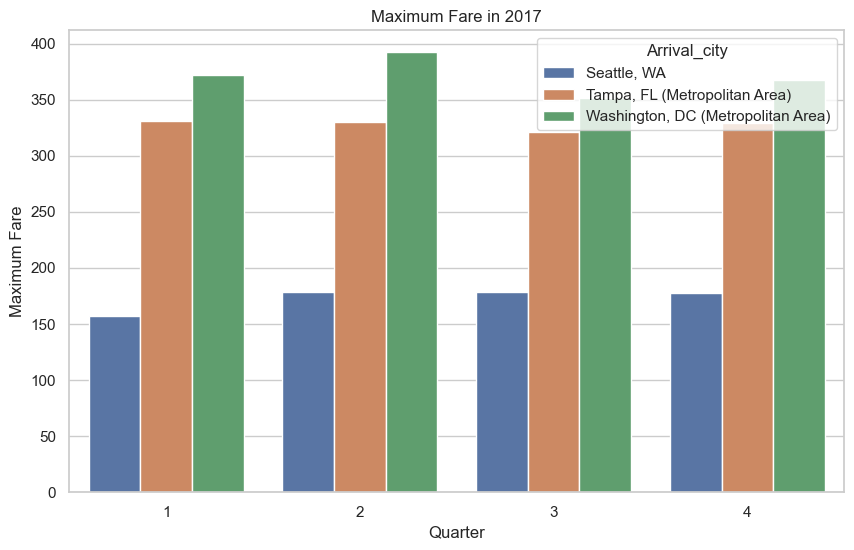

In [16]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.barplot(data=grouped_data_2017_max, x='quarter',y='fare', hue='Arrival_city')

plt.title('Maximum Fare in 2017')
plt.xlabel('Quarter')
plt.ylabel('Maximum Fare')
plt.savefig('../output/Maximum Fare in 2017.png')
plt.show()


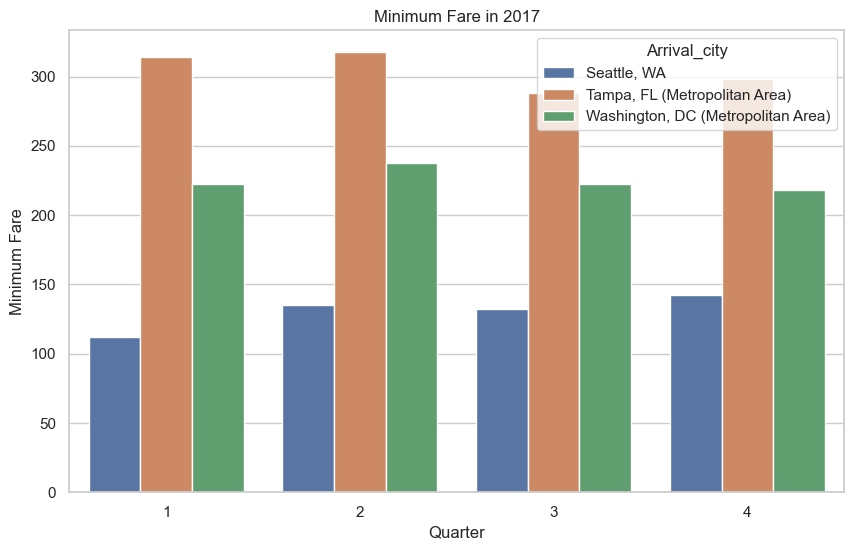

In [17]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.barplot(data=grouped_data_2017_min, x='quarter',y='fare', hue='Arrival_city')

plt.title('Minimum Fare in 2017')
plt.xlabel('Quarter')
plt.ylabel('Minimum Fare')
plt.savefig('../output/Minimum Fare in 2017.png')
plt.show()


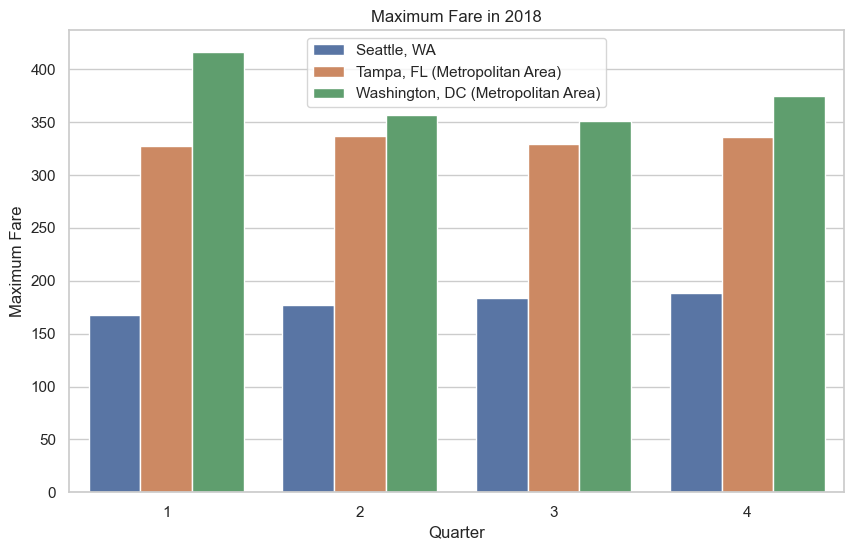

In [18]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.barplot(data=grouped_data_2018_max, x='quarter',y='fare', hue='Arrival_city')

plt.title('Maximum Fare in 2018')
plt.xlabel('Quarter')
plt.ylabel('Maximum Fare')
plt.legend(loc='upper center')
plt.savefig('../output/Maximum Fare in 2018.png')
plt.show()

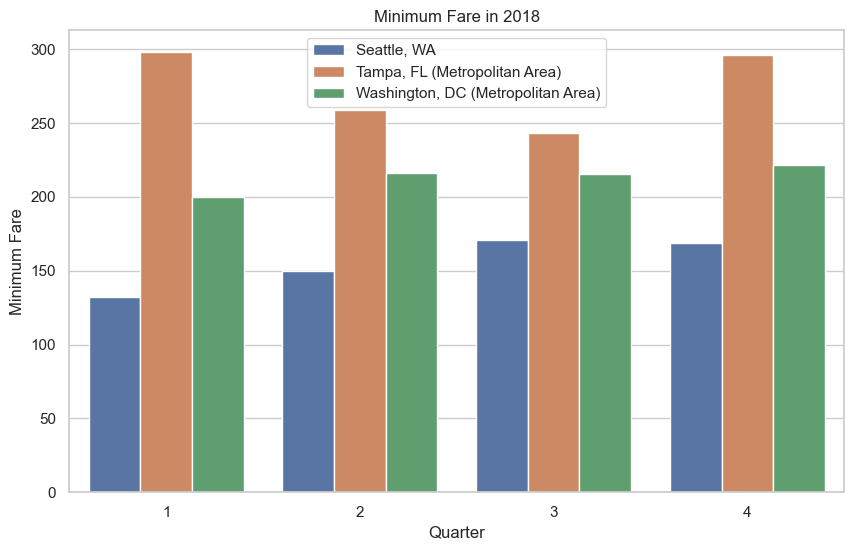

In [19]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.barplot(data=grouped_data_2018_min, x='quarter',y='fare', hue='Arrival_city')

plt.title('Minimum Fare in 2018')
plt.xlabel('Quarter')
plt.ylabel('Minimum Fare')
plt.legend(loc='upper center')
plt.savefig('../output/Minimum Fare in 2018.png')
plt.show()

In [20]:
#What we are trying to do here is group our clean dataframe with the Arrival City, Quarter, and Year columns using a groupby
#Then we can calculate the minimum average fare for each of the 3 routes per quarter and by year

# min_fare = clean_df.groupby(['Departure_city','Arrival_city','quarter','Year'])
# min_value = pd.DataFrame(min_fare['fare'].min())
# min_value = min_value.rename(columns = {"fare": "Minimum Fare"})
# min_value
